# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [67]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size. 


In [68]:
def Huffman_code(probability_dict):
    
    sorted_dict=sorted(probability_dict.items(), key=lambda t: t[1])
    it = iter(sorted_dict)
    di = dict(sorted_dict) 
    
    values_dict = di.values()
    values= list(values_dict)
    values.sort() 
    n=len(values)
    rebours=n
    list_steps=(-1)*np.ones((n,n)) 
    compteur=np.zeros((len(values), len(values))) 
    final_dict = di.copy() 
    old_value_max=[]
    all_max=[]
    j=0
    
    while j<n-2 and rebours>1:
        
        masked_values1 = np.ma.masked_equal(values, 0, copy=False)
        min1=np.min(masked_values1)
        indice_min1=values.index(min1)
        b = masked_values1[np.arange(len(masked_values1))!=indice_min1]
        min2=np.min(b)
        if min2==min1: 
            min1_repeat  = [index for (index, item) in enumerate(values) if item == min1]
            indice_min2=min1_repeat[1]
        else:
            indice_min2=values.index(min2)
        indice_max=max(indice_min1,indice_min2)
        
        indice_min=min(indice_min1, indice_min2)
        
        if (indice_min in old_value_max or indice_max in old_value_max):
            j+=1
            old_value_max=[]
            all_max.append(indice_max)
        
        if len(all_max)>1 and compteur[indice_max][indice_max]>=1 and compteur[all_max[-2]][all_max[-2]]>=1 and all_max[-2]>=indice_max :
            indice_max, indice_min = indice_min, indice_max 
            
        
        new_sum= values[indice_min] + values[indice_max]
        old_value_max.append(indice_max)
        values[indice_max] = round(new_sum, 12)
        values[indice_min] = 0
        rebours-=1
  
        
        if compteur[indice_max][indice_max]==0:
            compteur[indice_max][indice_max]=1
        else:
            for m in range(len(values)):
                if compteur[indice_max][m]==1:
                    compteur[indice_max][m]+=1
        for m in range(len(values)):
            if compteur[indice_min][m]!=0:
                compteur[indice_max][m]+=1
        compteur[indice_max][indice_min]=1

        last=0

        
        for k in range(n):
            if compteur[indice_max][k]==1:
                list_steps[k][j]=1
                last=k
            elif compteur[indice_max][k]>1:
                list_steps[k][j]=0
                last=k
        if rebours>0:
            list_steps[last][j]=0


    transitory=(-1)*np.ones(n, dtype=int)
    transitory=transitory.astype(str)
    
    for i in range (n):
        for j in range(n-1, -1, -1):
            if list_steps[i][j]!=-1:
                if transitory[i]=='-1':
                    transitory[i]=str(int(list_steps[i][j]))
                else: 
                    transitory[i]=transitory[i]+str(int(list_steps[i][j]))

        
    i=0
    for key in final_dict.keys():
        final_dict[key]=transitory[i]
        i+=1
            
    
    return final_dict




final={'h': 0.05460697048337416,
  'a': 0.06444180349736849,
  'r': 0.052496907666561565,
  'y': 0.020901748684242438,
  ' ': 0.1880114476971211,
  'p': 0.013412238364337513,
  'o': 0.06340132424631952,
  't': 0.07033057650796731,
  'e': 0.09671121243724382,
  'n': 0.0528970919938881,
  'd': 0.04030462516068007,
  's': 0.047786859401906336,
  'c': 0.016196551138706314,
  'b': 0.012922315733307464,
  'j': 0.0008998083965947952,
  'k': 0.009720841114695254,
  'w': 0.02036574422158085,
  'l': 0.03540539885037957,
  'i': 0.05045475491741651,
  'g': 0.020906599403361547,
  'v': 0.007040818801387305,
  'm': 0.0179428100215857,
  'u': 0.02364968106521792,
  'f': 0.016608862263830612,
  'x': 0.0009240619921903423,
  'z': 0.0006402949237224419,
  'q': 0.0010186510150129756}
print(Huffman_code(final))


{'z': '0111111111', 'j': '0111111110', 'x': '0111111101', 'q': '0111111100', 'v': '01111110', 'k': '0111110', 'b': '001111', 'p': '001110', 'c': '001101', 'f': '001100', 'm': '011110', 'w': '011011', 'y': '011010', 'g': '10111', 'u': '10110', 'l': '01110', 'd': '01100', 's': '1010', 'i': '1111', 'r': '1110', 'n': '1101', 'h': '1100', 'o': '0010', 'a': '0001', 't': '0000', 'e': '100', ' ': '000'}


### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course. 

In [69]:
def LZ_online(sequence):
    dictionary = dict()
    prefix = ''
    coded_text = ''

    dictionary[''] = 0
    for symbol in sequence:
        prefix += symbol
        if prefix in dictionary:
            continue
        else: 
            prev_prefix_address = dictionary.get(prefix[0:len(prefix)-1])
            dictionary[prefix] = len(dictionary)
            if prev_prefix_address == None :
                prev_prefix_address = 0

            address_nb_bits = np.ceil(np.log2(len(dictionary)-1))
            bin_format = '0' + str(int(address_nb_bits)) + 'b'
            coded_text += (format(prev_prefix_address,bin_format) + symbol)
            prefix = ''
        
    return dictionary,coded_text[1:] # remove the first character of the code that is a formating artifact

LZ_online("1011010100010")

({'': 0, '1': 1, '0': 2, '11': 3, '01': 4, '010': 5, '00': 6, '10': 7},
 '100011101100001000010')

### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [70]:
def LZ77(sequence, window_size = 7):
    sliding_window = '' #size of window_size
    
    code = ''
    i = 0
    while i < (len(sequence)-1):

        d = 0
        p = 0
        
        nb_occurrences = sliding_window.count(sequence[i])
        window_start_index = 0
        
        while nb_occurrences > 0:

            current_d = sliding_window.index(sequence[i], window_start_index)
            current_p = 0
            #start longuest prefix match
            while (i+current_p) < len(sequence) and (current_d + current_p) < len(sliding_window):
                if sequence[i+current_p] == sliding_window[current_d + current_p]:
                    current_p += 1
                else:
                    break
            
            if current_p >= p:
                p = current_p
                d = current_d
                d = len(sliding_window) - d
            
            window_start_index = current_d + 1
            nb_occurrences -= 1

        i += p
        code += str(d) + str(p) + sequence[i]
        i +=1
        start = i-window_size if i>window_size else 0
        sliding_window = sequence[start:i]
        
        
    return code

LZ77("abracadabrad", window_size=7) 

'00a00b00r31c21d74d'

In [71]:
# [Locked Cell] Evaluation of your functions by the examiner. 
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


#############################
For Morse text :
bin huffman code for given text : {'/': '111', '_': '110', '-': '10', '.': '0'}
Text length in bits = 2398580.0
Coded text length in bits = 2213141
Using the huffman code the compression rate is :0.9226880070708503bits per symbol
The expected average code length of the produced huffman code is =1.8453760141417006 bits per symbol
The empirical average code length of the produced huffman code is =1.8453760141417006 bits per symbol
The bounds for the average length is  :1.7713848706432271 <= average word length < 2.771384870643227
iteration 499 of 500
 Finished!


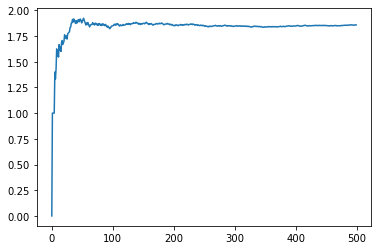

starting lz online)
Length of lempel-ziv compressed code is :1530401
The compression rate of the Lempel-ziv method ire =1.276089186101777
starting LZ 77
Length of LZ77 compressed code is :1391970
The compression rate of the LZ77 method is =1.160661724853872
#############################
For original alphabet text:
bin huffman code for given text : {'z': '0111111111', 'j': '0111111110', 'x': '0111111101', 'q': '0111111100', 'v': '01111110', 'k': '0111110', 'b': '001111', 'p': '001110', 'c': '001101', 'f': '001100', 'm': '011110', 'w': '011011', 'y': '011010', 'g': '10111', 'u': '10110', 'l': '01110', 'd': '01100', 's': '1010', 'i': '1111', 'r': '1110', 'n': '1101', 'h': '1100', 'o': '0010', 'a': '0001', 't': '0000', 'e': '100', ' ': '000'}
Text length in bits = 2061550.0
Coded text length in bits = 1711279
Using the huffman code the compression rate is :0.8300933763430428bits per symbol
The expected average code length of the produced huffman code is =4.150466881715215 bits per symbol
T

In [77]:
#import pyplot to make plots for questions like question 7
from matplotlib import pyplot as plt


#Opening the files and put them into one line string
text = ''
with open('morse.txt', 'r') as file:
    morse_text = file.read().replace('\n', '')

alphabet_text = ''
with open('text.txt', 'r') as file:
    alphabet_text = file.read().replace('\n', '')

def question5(text):

    occurency_dict = {}

    # loop over text and count occurrences.
    for i in text:

        if i in occurency_dict:
            occurency_dict[i] = occurency_dict[i] + 1
        else:
            occurency_dict[i] = 1


    #loop over symbols to compute their probability approximation
    proba_dict = {}
    for i in occurency_dict:
        proba_dict[i] = occurency_dict[i]/len(text)
        print("Probability of symbol '" + i + "' is =" + str(proba_dict[i]))

    #get huffman dictionary and then code the text
    huffman_dict = Huffman_code(proba_dict)
    print("bin huffman code for given text : " + str(huffman_dict))

    coded_text = ''
    for i in text:
        coded_text += huffman_dict[i]

    print('Text length in bits = ' + str(len(text) * np.ceil(np.log2(len(proba_dict)))) )
    print('Coded text length in bits = ' + str(len(coded_text)))
    print('Using the huffman code the compression rate is :' + str(len(coded_text)/(len(text)* np.ceil(np.log2(len(proba_dict))))) + 'bits per symbol')
    

    return proba_dict,huffman_dict,coded_text

def question6(char_proba_dict,huffman_dict,coded_text,original_text):

 #weighted average length of huffman code
    expected_average_code_len = 0.0
    for i in huffman_dict:
        expected_average_code_len += char_proba_dict[i] * len(huffman_dict[i])

    print('The expected average code length of the produced huffman code is =' + str(expected_average_code_len) + ' bits per symbol')

    empirical_average_code_len = len(coded_text)/len(original_text)

    print('The empirical average code length of the produced huffman code is =' + str(empirical_average_code_len) + ' bits per symbol')

    #theoretical bound is 
    theoretical_bound = 0.0
    for i in char_proba_dict:
        theoretical_bound += char_proba_dict[i] * np.log2(1/char_proba_dict[i]) # H(s)

    print('The bounds for the average length is  :' + str(theoretical_bound) + " <= average word length < " + str(theoretical_bound + 1))

    return

def question7(original_text, huffman_code_dict, upper_text_len_bound = 500, step = 1):

    emp_averages_code_lengths = np.zeros((len(original_text)))

    for i in range(1,upper_text_len_bound,step):
        print('iteration ' + str(i) + ' of ' + str(upper_text_len_bound), end ="\r")
        code = ''
        for j in original_text[0:i]:
            code += huffman_code_dict[j]

        emp_averages_code_lengths[i] = len(code)/i
    print('\n Finished!', end ="\n")

    plt.plot(np.arange(start = 0,stop =upper_text_len_bound),emp_averages_code_lengths[0:upper_text_len_bound])
    plt.savefig('evolution of the empirical average length.pdf', format="pdf")  
    plt.show()
    
    return

def question11():

    return

def question12():

    return

def question14(alphabet_text):
    print("#############################")
    print("For original alphabet text:")

    alphabet_char_probabilities, alphabet_huffman_dict, alphabet_huffman_coded = question5(alphabet_text)
    question6(alphabet_char_probabilities, alphabet_huffman_dict, alphabet_huffman_coded, alphabet_text)

    return


############### Q5 

print("#############################")
print("For Morse text :")
morse_char_probabilities, morse_huffman_dict, morse_huffman_coded = question5(morse_text)

################ Q6
 
question6(morse_char_probabilities, morse_huffman_dict, morse_huffman_coded, morse_text)

################ Q7

question7(morse_text,morse_huffman_dict)

################ Q8
print("starting lz online)")
_,lempel_ziv_coded_morse = LZ_online(morse_text)
print('Length of lempel-ziv compressed code is :' + str(len(lempel_ziv_coded_morse)))
print('The compression rate of the Lempel-ziv method ire =' + str(len(lempel_ziv_coded_morse)/len(morse_text)))

################ Q9
print( 'starting LZ 77')
lz77_coded_morse = LZ77(morse_text,7)

print('Length of LZ77 compressed code is :' + str(len(lz77_coded_morse)))
print('The compression rate of the LZ77 method is =' + str(len(lz77_coded_morse)/len(morse_text)))

################# Q11

#TODO:Second option seems more effective than first option . after looking it up it turns out that this method has a name. It's called DEFLATE.

################# Q12


################# Q14

question14(alphabet_text)
################ Q 15





## Channel coding

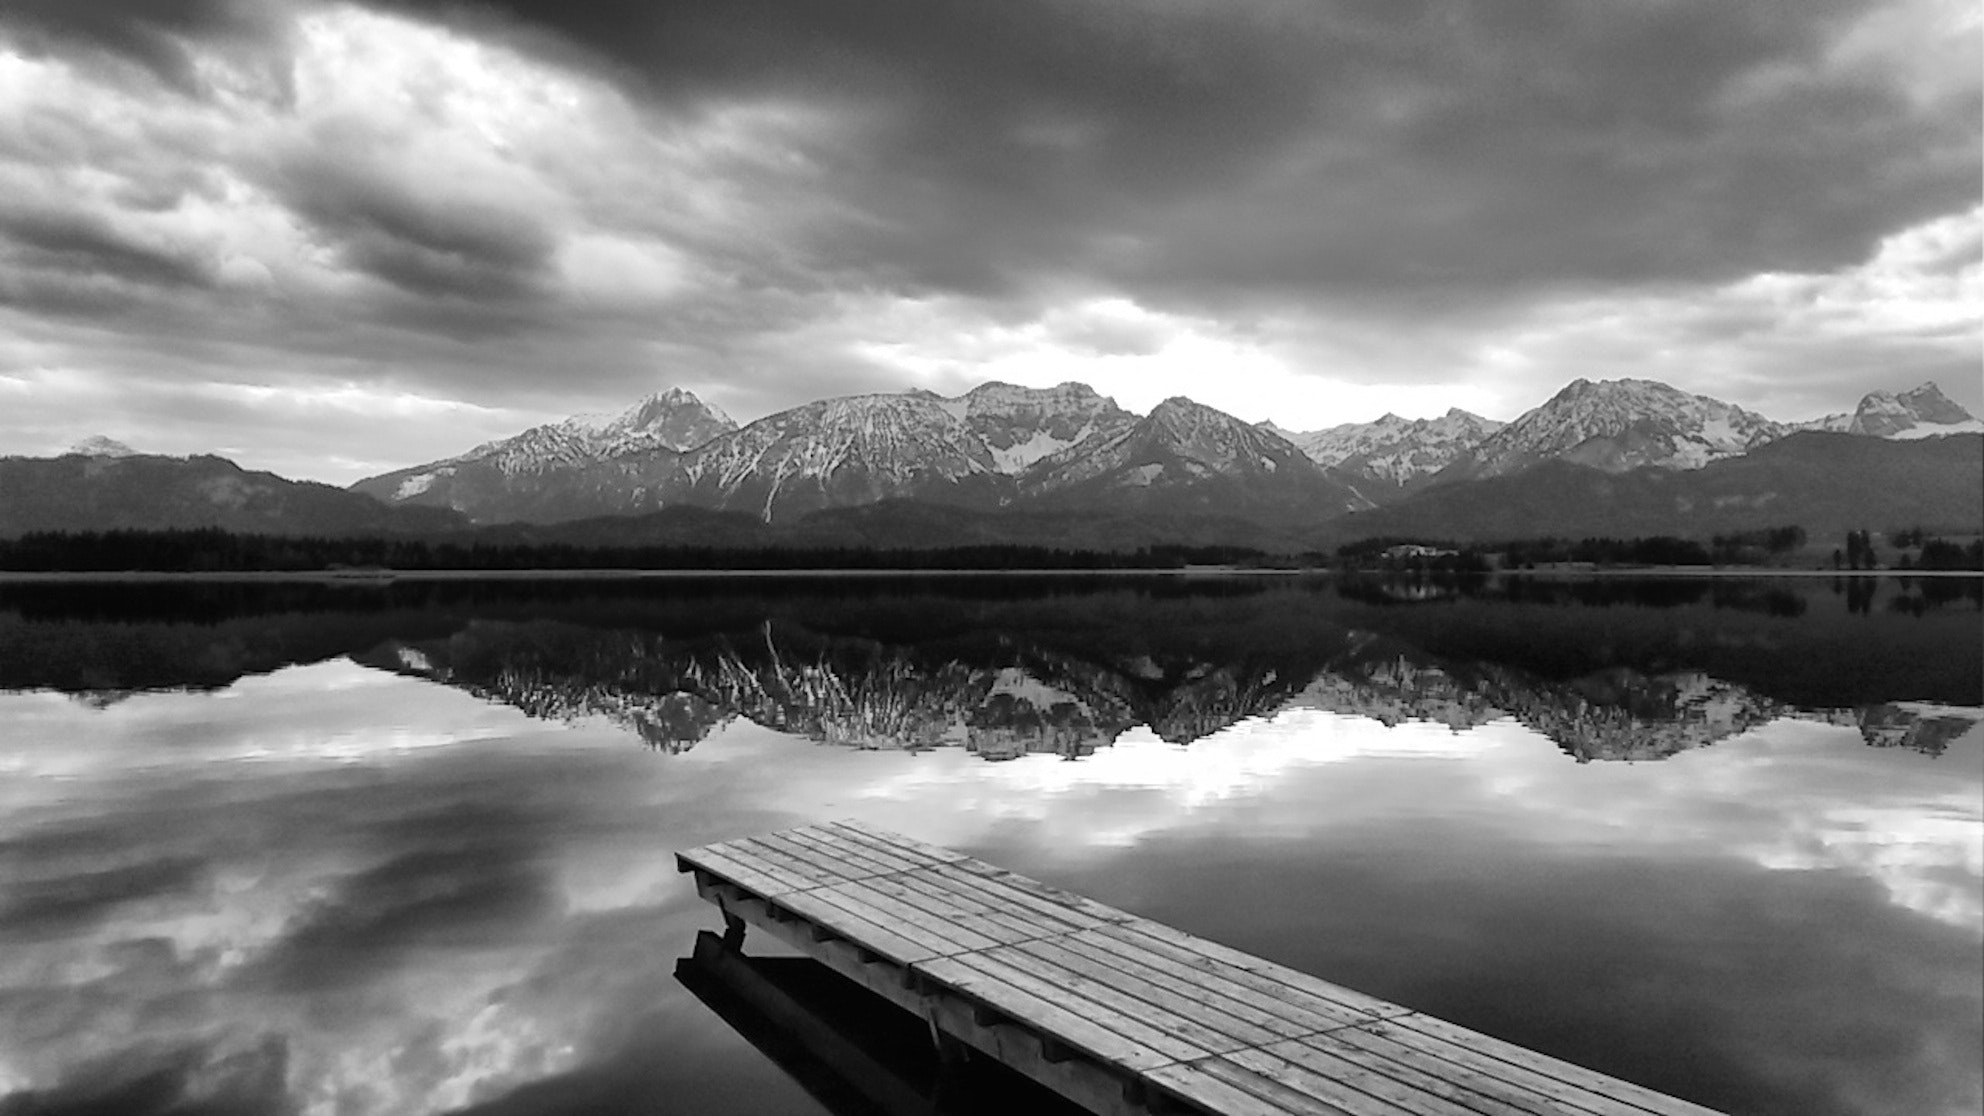

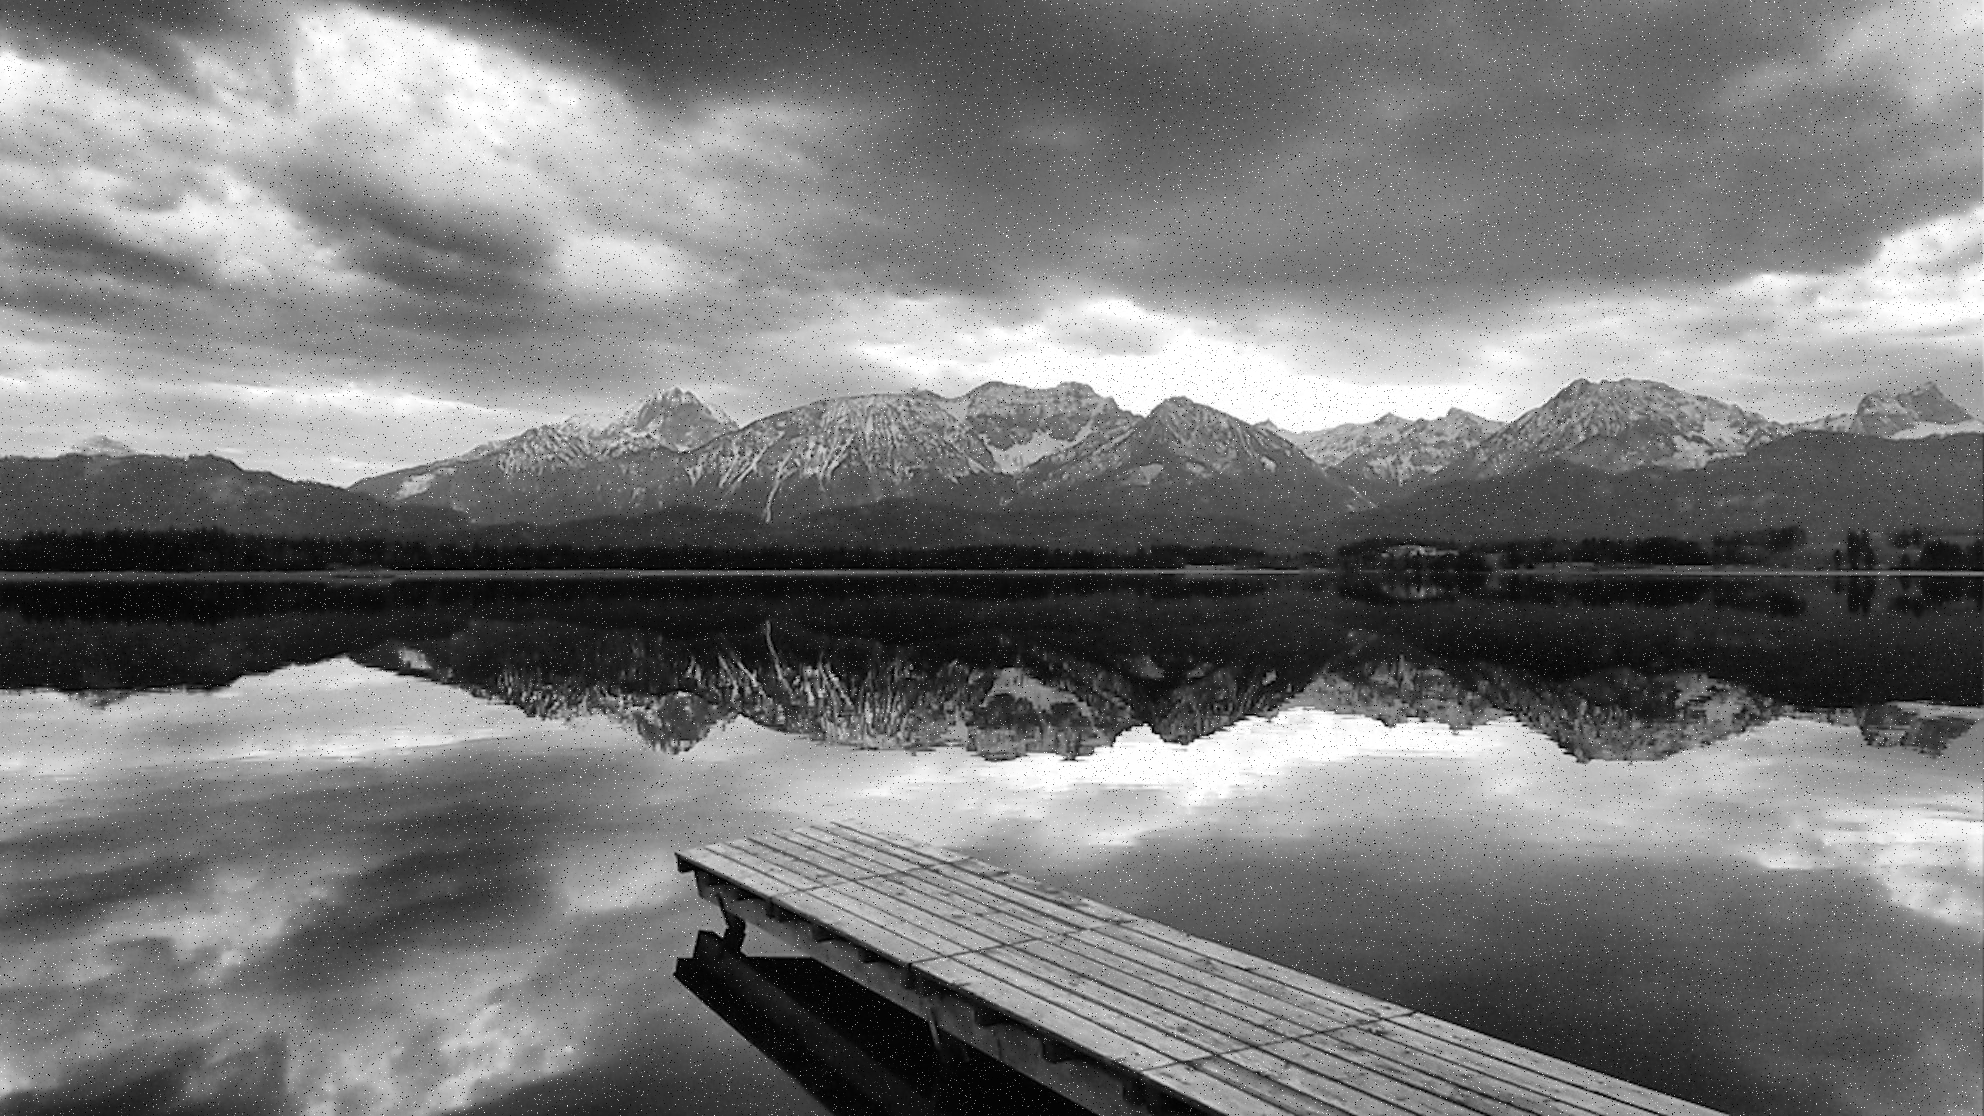

KeyboardInterrupt: 

In [73]:
# Write here your codes for questions 16 to 21 (you may delete this comment)
# From here, you may import either opencv (cv2) or the Python Imaging Library (PIL), but no other extra libraries.

from PIL import Image,ImageOps
import sys
import numpy as np

def read_greyscale_image(path):

    img = Image.open(path) 
    if img is None:
        sys.exit("Could not read the image.")

    grey_scale = ImageOps.grayscale(img)
    display(grey_scale) 

    return grey_scale

def save_image(img,path):
    if img is None or path is None:
        sys.exit("Could not save Image.")

    img.save(path, "PNG")

    return

def encode_image(img):
    return np.matrix.flatten(np.unpackbits(np.asarray(img),axis = 1))

def decode_image(image_as_bits,shape):
    return np.reshape(np.packbits(image_as_bits,axis = 0),shape)

def hamming_sequence_encoding(sequence):
    #pad the sequence to be a multiple of 4
    padding_len = len(sequence) % 4
    np.append(sequence,np.zeros(padding_len, dtype=np.int8))

    #apply hamming code to every 4 char
    hamming_sequence = np.zeros(len(sequence)//4*7,dtype=np.int8)
    for i in range(0,len(sequence),4):
        code = hamming_code(sequence[i:i+4])

        hamming_sequence[((i//4)*7):((i//4)*7)+7] = code

    return hamming_sequence

def hamming_sequence_decoding(sequence,original_nb_bits):
    decoded_sequence = np.zeros(len(sequence)//7 * 4,dtype=np.int8)
    nb_corrections = 0 

    for i in range(0,len(sequence),7):
        decoded_bits = decode_hamming(sequence[i:i+7])
        if np.array_equal(decoded_bits, sequence[i:i+4]):
            None
        else :
            nb_corrections += 1

        decoded_sequence[(i//7) *4 : ((i//7) * 4) + 4] = decoded_bits
        
    #remove padding done at source
    return decoded_sequence[0:original_nb_bits]

def sequence_through_channel(original_sequence):
    noisy_sequence = original_sequence

    for i, bit in enumerate(noisy_sequence):
        noisy_sequence[i] = noisy_channel(bit)

    return noisy_sequence

def noisy_channel(bit):
    if np.random.rand() > 0.01 :
        return bit
    else:
        return (bit + 1) % 2

def hamming_code(bits):
    if len(bits) != 4:
        print('error: wrong number of bits given')
        return None

    parity = np.zeros(3,dtype=np.int8)
    for i in range(len(parity)):
        parity[i] = (bits[i%4] + bits[(i+1)%4] + bits[(i+2)%4]) % 2

    code = np.append(bits,parity)
    return code

def decode_hamming(code):
    if len(code) != 7:
        print('error: wrong number of bits given')
        return None

    bits = np.copy(code[0:4])
    received_parity = code[4:7]
    computed_parity = (hamming_code(code[0:4]))[4:7]

    syndrome = np.zeros(3,dtype=np.int8)
    nb_errors = 0 

    for i in range(len(received_parity)):

        if(computed_parity[i] != received_parity[i]):
            syndrome[i] = 1
            nb_errors += 1

    if nb_errors == 3:
        bits[2] = (code[2] + 1) % 2

    if nb_errors == 2:
        if syndrome[0] and syndrome[1]:
            bits[1] = (code[1] + 1) % 2

        if syndrome[1] and syndrome[2]:
            bits[3] = (code[3] + 1) % 2

        if syndrome[2] and syndrome[0]:
            bits[0] = (code[0] + 1) % 2

    return bits


def number_of_differences(seq1,seq2):
    nb_diff = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            nb_diff += 1
    
    return nb_diff

def naive_hamming_seq_decoding(sequence,original_nb_bits):

    decoded_sequence = np.zeros(len(sequence)//7 * 4,dtype=np.int8)

    for i in range(0,len(sequence),7):
        decoded_sequence[(i//7) *4 : ((i//7) * 4) + 4] = sequence[i:i+4]
        
    #remove padding done at source
    return decoded_sequence[0:original_nb_bits]

######################################## Code to answer the questions ##############

#### 16 :Load image and show ####################

original_image = read_greyscale_image("image.png")

#### 17 :Encode image using 1byte/pixel #########

image_as_sequence = encode_image(original_image)

#### 18 :Simulate channel and decode sequence ###
im_width, im_height = original_image.size

after_channel = decode_image(sequence_through_channel(image_as_sequence),(im_height,im_width))
display(Image.fromarray(after_channel))

save_image(Image.fromarray(after_channel),'noisy.png')

#### 19 :Encode image using Hamming code #########
hamming_sequence = hamming_sequence_encoding(image_as_sequence)

#### 20 :Simulate channel on Hamming sequence ####
hamming_after_channel = sequence_through_channel(hamming_sequence)

decoded_hamming = hamming_sequence_decoding(hamming_after_channel,len(image_as_sequence))
naive_decoded_hamming = naive_hamming_seq_decoding(hamming_after_channel,len(image_as_sequence))

print("errors without hamming decoding compared to original image = " + str(number_of_differences(image_as_sequence, naive_decoded_hamming)))
print("errors with  hamming decoding compared to original image = " + str(number_of_differences(image_as_sequence, decoded_hamming)))

display(Image.fromarray(decode_image(decoded_hamming,(im_height,im_width))))
save_image(Image.fromarray(decode_image(decoded_hamming,(im_height,im_width))),'postHamming_decoded.png')
save_image(Image.fromarray(decode_image(naive_decoded_hamming,(im_height,im_width))),'naive_Hamming_decoding.png')
